# Imports and Functions

In [1]:
import pandas as pd
from time import time

import visuals as vs 

%matplotlib inline

# Load Data

In [39]:
df_data = pd.read_csv('../data/data_feat.csv')
df_data.head()

,SUBJECT,AUTHOR,TEXT,TEXT_CLEAN,NUM_STOPWORDS,NUM_PUNCTUATIONS,NUM_WORDS_UPPER,NUM_CHARS,NUM_WORDS,AVG_WORD
0,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,19/03/2009\nFATO CORRIQUEIRO\nO fato mais impo...,19 03 2009 fato corriqueiro fato importante se...,67,29,5,1375,199,5.787129
1,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,06/07/2009\nPOLÍTICA DE ESTADO\nUm problema cr...,06 07 2009 politica estado problema cronico po...,75,29,11,1342,207,5.449275
2,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,12/07/2009\nTOQUE DE RECOLHER\nProcurado para ...,12 07 2009 toque recolher procurado suspender ...,95,46,11,1587,257,5.180392
3,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,23/03/2009\nCRISE SOCIOEDUCATIVA\nOcorreram du...,23 03 2009 crise socioeducativa ocorreram duas...,55,26,6,1141,167,5.761905
4,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,24/12/2008\nESTATÍSTICAS CRIMINAIS CONFIÁVEIS\...,24 12 2008 estatisticas criminais confiaveis b...,133,43,17,2309,366,5.246612


# Prep Data

In [40]:
df_data['SUBJECT'] = df_data['SUBJECT'].astype('category')
df_data['AUTHOR'] = df_data['AUTHOR'].astype('category')

In [37]:
#df_data['AUTHOR_CODE'] = df_data['AUTHOR'].astype('category').cat.codes

In [38]:
#df_data.head()

,SUBJECT,AUTHOR,TEXT,TEXT_CLEAN,NUM_STOPWORDS,NUM_PUNCTUATIONS,NUM_WORDS_UPPER,NUM_CHARS,NUM_WORDS,AVG_WORD,AUTHOR_CODE
0,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,19/03/2009\nFATO CORRIQUEIRO\nO fato mais impo...,19 03 2009 fato corriqueiro fato importante se...,67,29,5,1375,199,5.787129,62
1,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,06/07/2009\nPOLÍTICA DE ESTADO\nUm problema cr...,06 07 2009 politica estado problema cronico po...,75,29,11,1342,207,5.449275,62
2,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,12/07/2009\nTOQUE DE RECOLHER\nProcurado para ...,12 07 2009 toque recolher procurado suspender ...,95,46,11,1587,257,5.180392,62
3,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,23/03/2009\nCRISE SOCIOEDUCATIVA\nOcorreram du...,23 03 2009 crise socioeducativa ocorreram duas...,55,26,6,1141,167,5.761905,62
4,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,24/12/2008\nESTATÍSTICAS CRIMINAIS CONFIÁVEIS\...,24 12 2008 estatisticas criminais confiaveis b...,133,43,17,2309,366,5.246612,62


In [34]:
#classes = dict(enumerate(df_data['AUTHOR'].cat.categories))
#classes

In [43]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(df_data['AUTHOR'])
encoded_Y = encoder.transform(df_data['AUTHOR'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [44]:
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(df_data['TEXT_CLEAN'], dummy_y,
                                                    test_size=0.2, stratify=df_data['AUTHOR'], random_state=42)

In [45]:
print(f'train shape {sentences_train.shape}')
print(f'test shape {sentences_test.shape}')

train shape (2402,)
test shape (601,)


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2402x62456 sparse matrix of type '<class 'numpy.int64'>'
	with 520605 stored elements in Compressed Sparse Row format>

# Keras DNN

In [47]:
from keras.models import Sequential
from keras import layers

In [48]:
input_dim = X_train.shape[1]  # Number of features

In [53]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                624570    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1100      
Total params: 625,670
Trainable params: 625,670
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 2402 samples, validate on 601 samples
Epoch 1/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.2143 - acc: 0.9992 - val_loss: 1.9165 - val_acc: 0.5441
Epoch 2/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.1344 - acc: 0.9996 - val_loss: 1.8867 - val_acc: 0.5624
Epoch 3/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0892 - acc: 0.9996 - val_loss: 1.8723 - val_acc: 0.5524
Epoch 4/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0621 - acc: 0.9996 - val_loss: 1.9056 - val_acc: 0.5441
Epoch 5/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0447 - acc: 0.9996 - val_loss: 1.8839 - val_acc: 0.5458
Epoch 6/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0331 - acc: 1.0000 - val_loss: 1.8836 - val_acc: 0.5458
Epoch 7/20
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0250 - acc: 1.0000 - val_loss: 1.8968 - val_acc: 0.5408
Epoch 8/20
2402

In [57]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.5657


In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

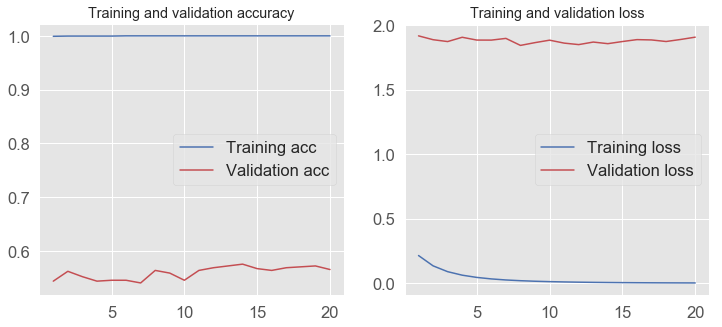

In [59]:
plot_history(history)